In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
# plt.style.use('seaborn')
# %matplotlib inline

In [3]:
# 1. Load and Prepare the Data
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [4]:
file_path_train = 'dataset/train.jsonl'
file_path_test = 'dataset/test.jsonl'
file_path_valid = 'dataset/validation.jsonl'
raw_data_train = load_jsonl(file_path_train)
raw_data_valid = load_jsonl(file_path_valid)
raw_data_test = load_jsonl(file_path_test)

In [5]:
# Convert to DataFrame by flattening the nested structure
def flatten_dialogs(data):
    flat_data = []
    for game in data:
        for i in range(len(game['messages'])):
            flat_data.append({
                'game_id': game['game_id'],
                'message': game['messages'][i],
                'sender': game['speakers'][i],
                'receiver': game['receivers'][i],
                'sender_label': game['sender_labels'][i],
                'receiver_label': game['receiver_labels'][i],
                'absolute_index': game['absolute_message_index'][i],
                'relative_index': game['relative_message_index'][i],
                'season': game['seasons'][i],
                'year': game['years'][i],
                'game_score': game['game_score'][i],
                'score_delta': game['game_score_delta'][i]
            })
    return pd.DataFrame(flat_data)

In [6]:
df_train = flatten_dialogs(raw_data_train)
df_valid = flatten_dialogs(raw_data_valid)
df_test = flatten_dialogs(raw_data_test)

In [7]:
# 2. Basic Data Overview
print("Dataset Shape:", df_train.shape)
print("\nDataset Info:")
print(df_train.info())
print("\nMissing Values:")
print(df_train.isnull().sum())

Dataset Shape: (13132, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         13132 non-null  int64 
 1   message         13132 non-null  object
 2   sender          13132 non-null  object
 3   receiver        13132 non-null  object
 4   sender_label    13132 non-null  bool  
 5   receiver_label  13132 non-null  object
 6   absolute_index  13132 non-null  int64 
 7   relative_index  13132 non-null  int64 
 8   season          13132 non-null  object
 9   year            13132 non-null  object
 10  game_score      13132 non-null  object
 11  score_delta     13132 non-null  object
dtypes: bool(1), int64(3), object(8)
memory usage: 1.1+ MB
None

Missing Values:
game_id           0
message           0
sender            0
receiver          0
sender_label      0
receiver_label    0
absolute_index    0
relative_ind

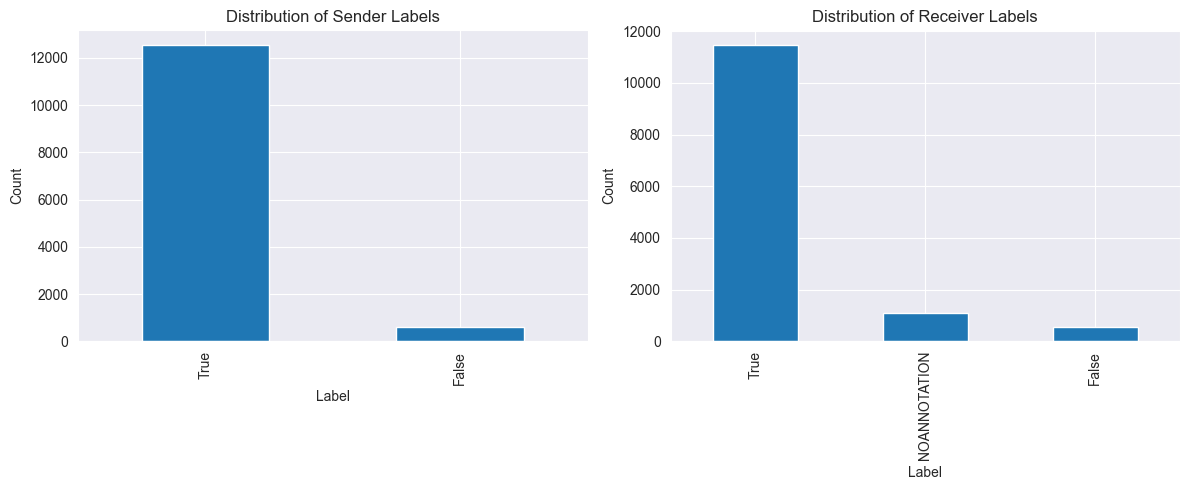

In [8]:
# 3. Distribution of Labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_train['sender_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sender Labels')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df_train['receiver_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Receiver Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [9]:
# Count and print number of True and False messages for sender and receiver labels
def print_label_counts(df):
    # Sender labels
    sender_counts = df['sender_label'].value_counts()
    print("\nSender Label Counts:")
    print(f"True messages: {sender_counts.get(True, 0)}")
    print(f"False messages: {sender_counts.get(False, 0)}")
    
    # Receiver labels
    receiver_counts = df['receiver_label'].value_counts()
    print("\nReceiver Label Counts:")
    print(f"True messages: {receiver_counts.get(True, 0)}")
    print(f"False messages: {receiver_counts.get(False, 0)}")
    print(f"NOANNOTATION messages: {receiver_counts.get('NOANNOTATION', 0)}")

# Call the function after creating the DataFrame
print_label_counts(df_train)


Sender Label Counts:
True messages: 12541
False messages: 591

Receiver Label Counts:
True messages: 11459
False messages: 566
NOANNOTATION messages: 1107


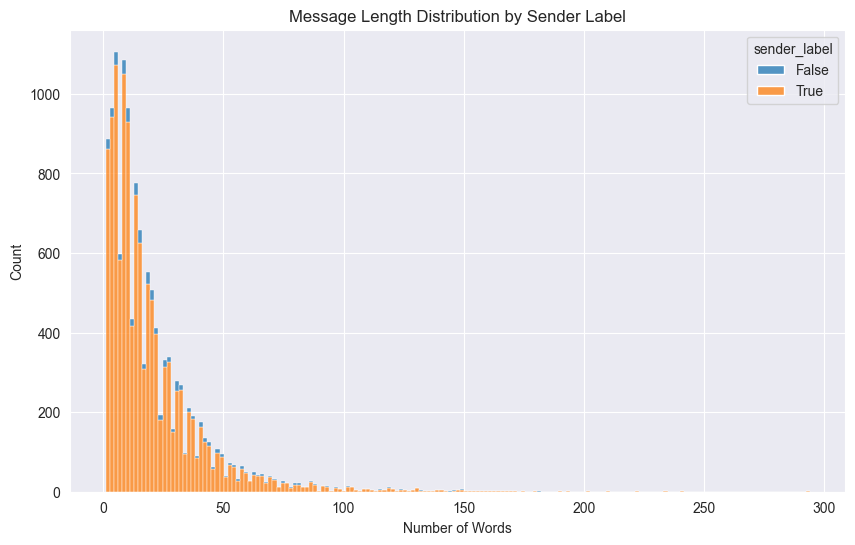

In [10]:
# 4. Message Length Analysis
df_train['message_length'] = df_train['message'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='message_length', hue='sender_label', multiple='stack')
plt.title('Message Length Distribution by Sender Label')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

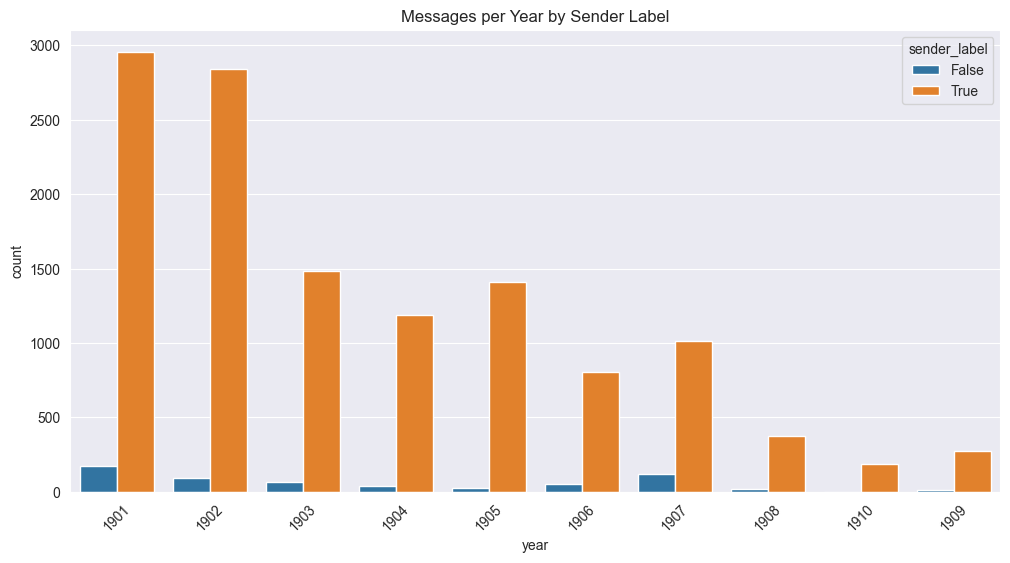

In [11]:
# 5. Temporal Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='year', hue='sender_label')
plt.title('Messages per Year by Sender Label')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

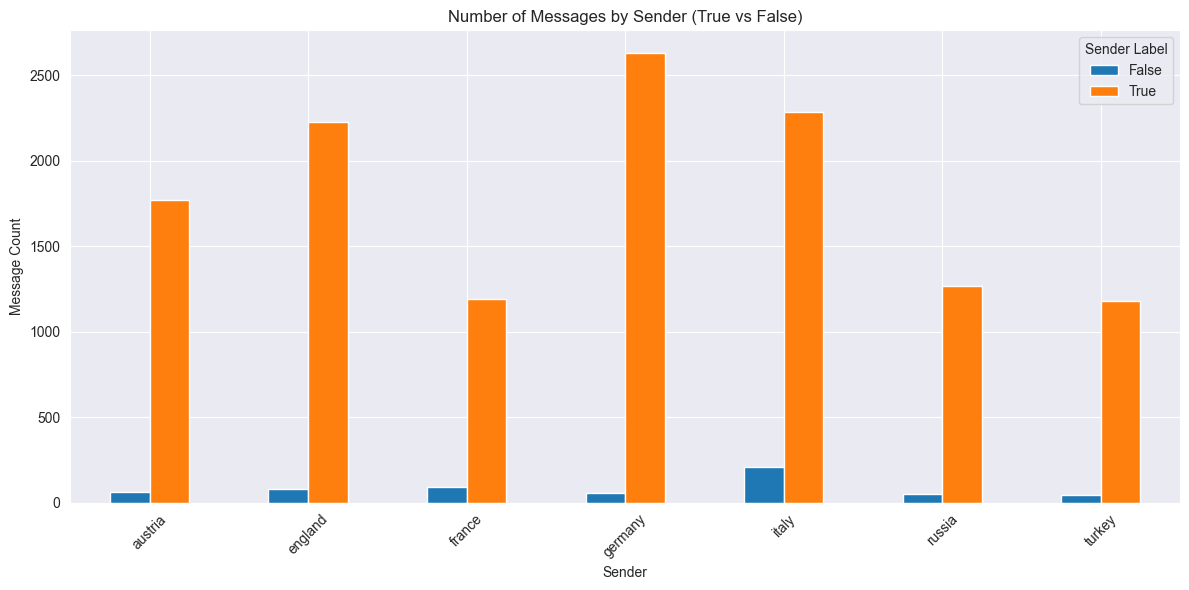


Message Counts by Sender and Label:
sender_label  False  True 
sender                    
austria          59   1768
england          79   2225
france           91   1188
germany          56   2631
italy           208   2285
russia           51   1266
turkey           47   1178


In [12]:
# 7. Player Analysis with True/False Breakdown
plt.figure(figsize=(12, 6))

# Group data by sender and sender_label, then count
sender_label_counts = df_train.groupby(['sender', 'sender_label']).size().unstack(fill_value=0)

# Create a grouped bar plot
sender_label_counts.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Number of Messages by Sender (True vs False)')
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.legend(title='Sender Label', labels=['False', 'True'])  # 0=False, 1=True
plt.tight_layout()
plt.show()

# Print the counts for reference
print("\nMessage Counts by Sender and Label:")
print(sender_label_counts)

[nltk_data] Downloading package stopwords to C:\Users\Satwik
[nltk_data]     Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 words in Truthful messages (excluding stopwords):
would: 1241
think: 1208
like: 1028
get: 1007
support: 982
france: 980
going: 940
i’m: 926
italy: 915
move: 895

Top 10 words in Deceptive messages (excluding stopwords):
think: 113
like: 101
going: 96
get: 85
support: 83
would: 76
i’m: 75
want: 74
russia: 65
take: 62


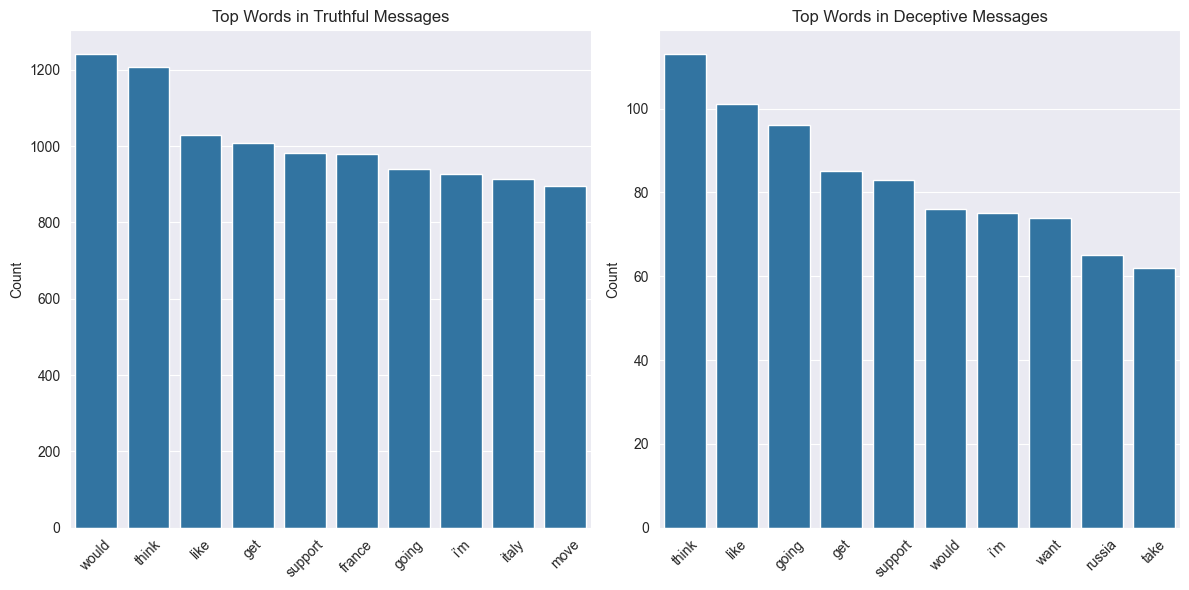

In [13]:
# 10. Word Frequency Analysis (Excluding Common Stopwords)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Download stopwords if not already downloaded
from collections import Counter

def get_top_words(df, label, n=10):
    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Add any additional common words you want to exclude
    custom_stopwords = {'i', 'you', 'we', 'it', 's', 're'}  # Customize as needed
    stop_words.update(custom_stopwords)
    
    words = Counter()
    messages = df[df['sender_label'] == label]['message']
    
    for msg in messages:
        # Convert to lowercase and split into words
        word_list = str(msg).lower().split()
        # Filter out stopwords
        filtered_words = [word for word in word_list if word not in stop_words]
        words.update(filtered_words)
    
    return words.most_common(n)

# Get top words for True and False messages
true_words = get_top_words(df_train, True)
false_words = get_top_words(df_train, False)

# Print results
print("\nTop 10 words in Truthful messages (excluding stopwords):")
for word, count in true_words:
    print(f"{word}: {count}")

print("\nTop 10 words in Deceptive messages (excluding stopwords):")
for word, count in false_words:
    print(f"{word}: {count}")

# Optional: Visualize the results
plt.figure(figsize=(12, 6))

# True words
true_df = pd.DataFrame(true_words, columns=['Word', 'Count'])
plt.subplot(1, 2, 1)
sns.barplot(x='Word', y='Count', data=true_df)
plt.title('Top Words in Truthful Messages')
plt.xticks(rotation=45)
plt.xlabel('')

# False words
false_df = pd.DataFrame(false_words, columns=['Word', 'Count'])
plt.subplot(1, 2, 2)
sns.barplot(x='Word', y='Count', data=false_df)
plt.title('Top Words in Deceptive Messages')
plt.xticks(rotation=45)
plt.xlabel('')

plt.tight_layout()
plt.show()

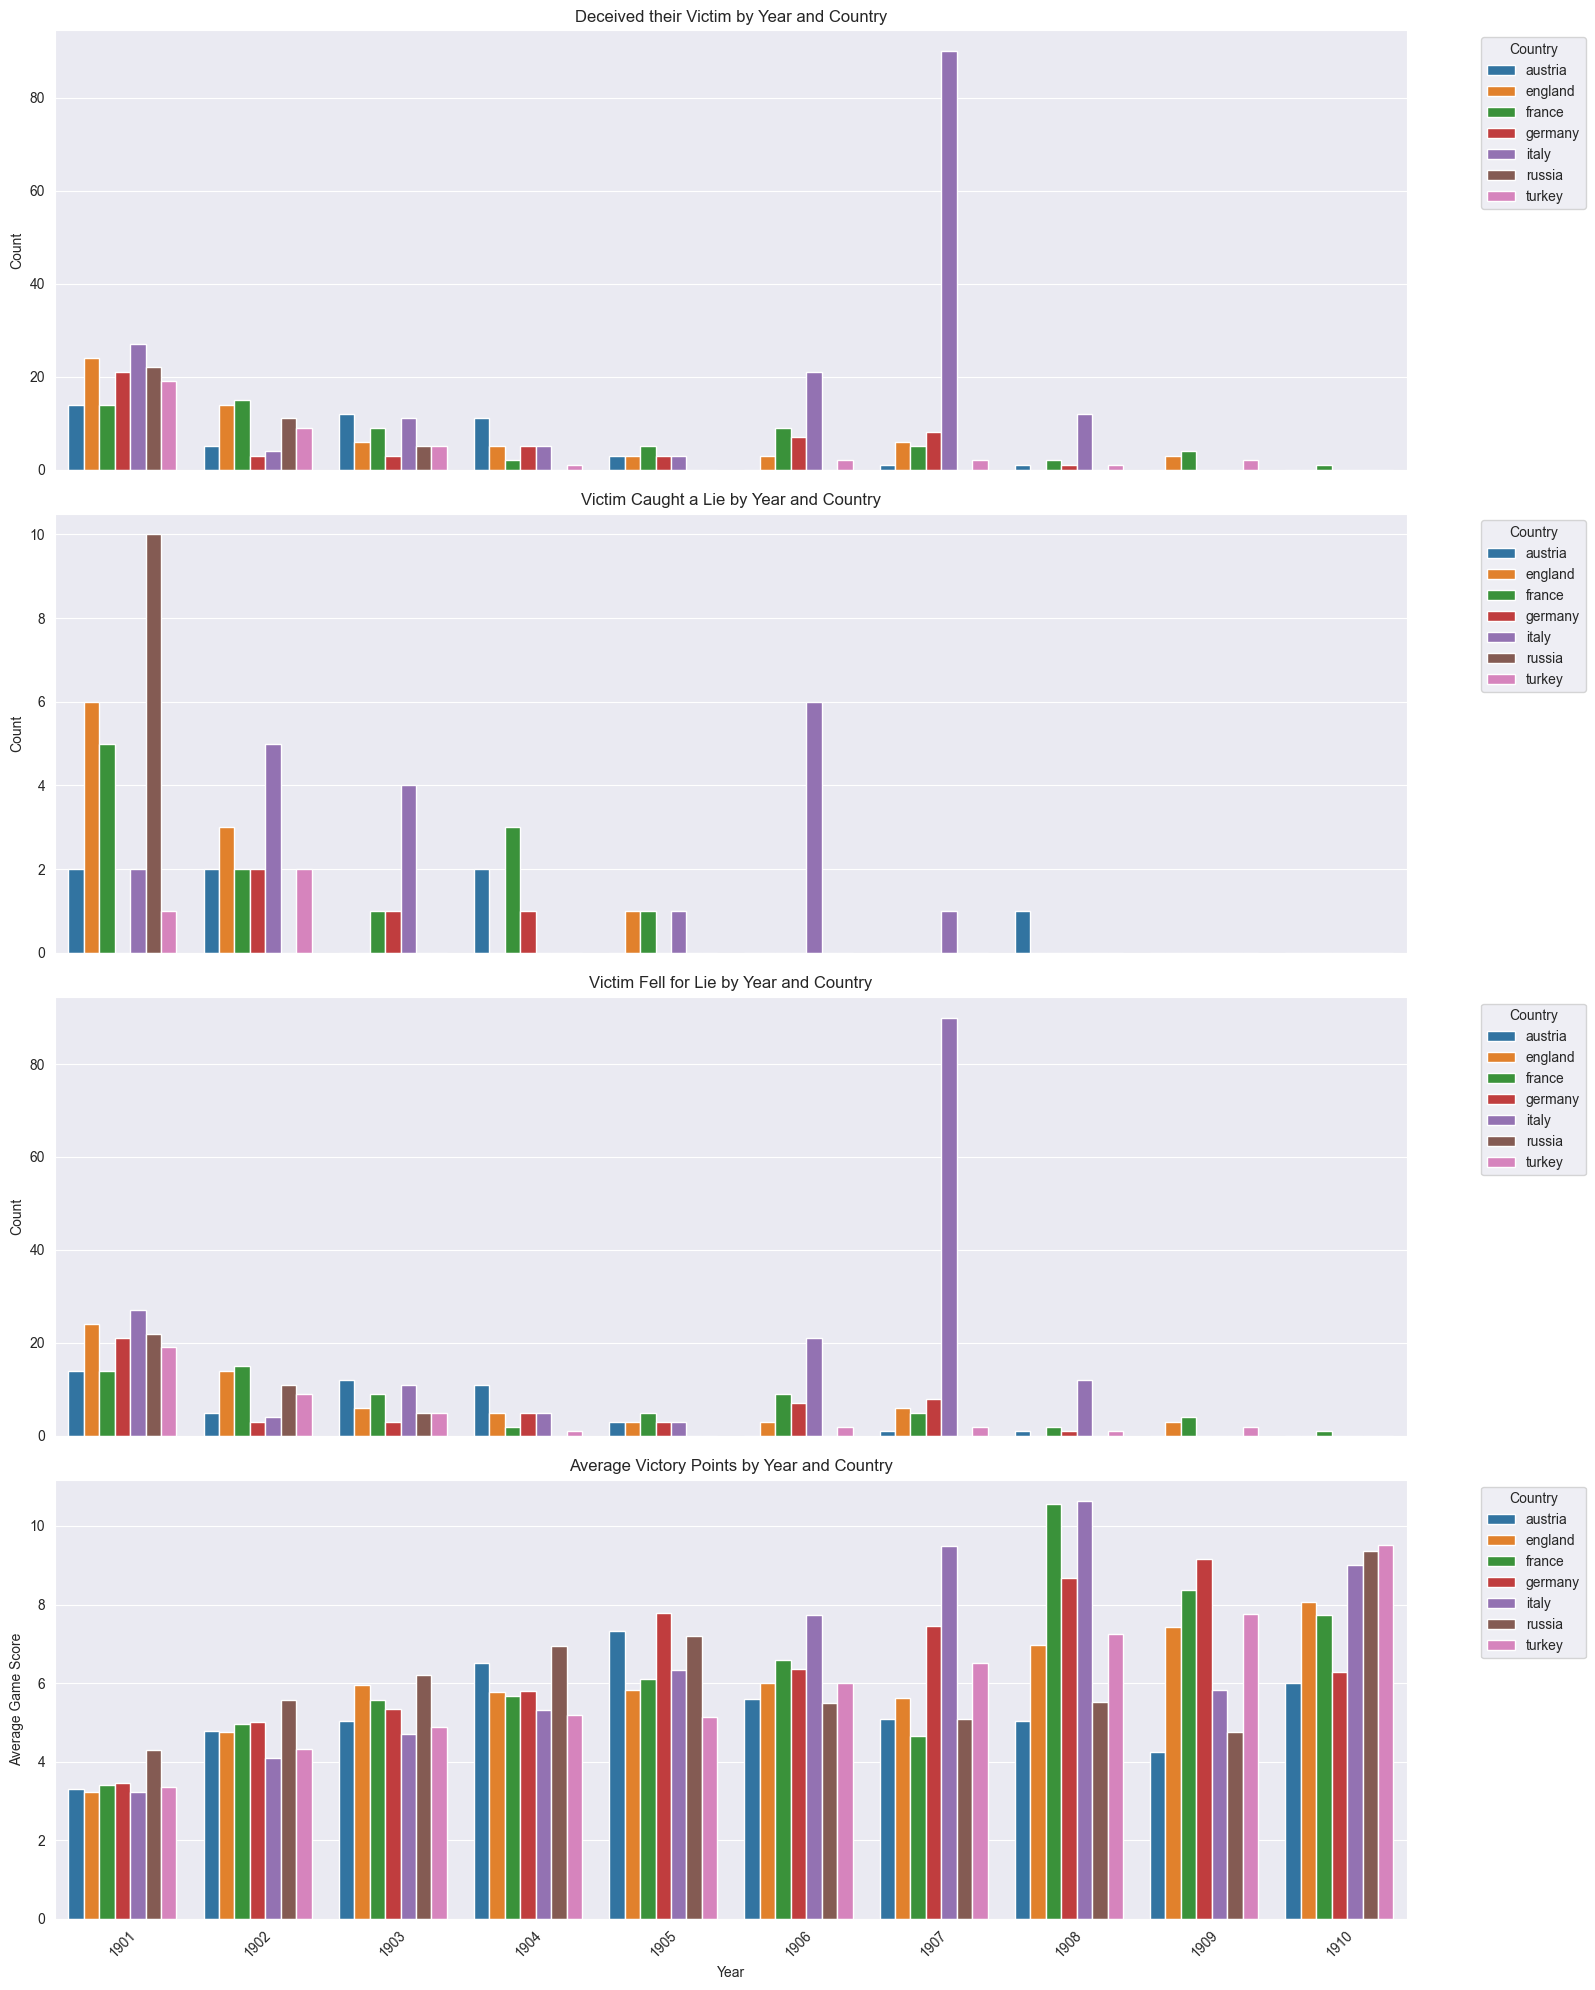


Yearly Counts and Average Victory Points by Country:
    year   sender  deceived_victim  caught_lie  fell_for_lie  game_score
0   1901  austria               14           2            14    3.317343
1   1901  england               24           6            24    3.233996
2   1901   france               14           5            14    3.400000
3   1901  germany               21           0            21    3.454728
4   1901    italy               27           2            27    3.236577
..   ...      ...              ...         ...           ...         ...
65  1910   france                1           0             1    7.722222
66  1910  germany                0           0             0    6.294118
67  1910    italy                0           0             0    9.000000
68  1910   russia                0           0             0    9.352941
69  1910   turkey                0           0             0    9.510204

[70 rows x 6 columns]


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded from previous code

# Convert game_score to numeric type
df_train['game_score'] = pd.to_numeric(df_train['game_score'], errors='coerce')

# Define categories based on sender and receiver labels
df_train['deceived_victim'] = (df_train['sender_label'] == False) & (df_train['receiver_label'] == True)
df_train['caught_lie'] = (df_train['sender_label'] == False) & (df_train['receiver_label'] == False)
df_train['fell_for_lie'] = df_train['deceived_victim']

# Group by year and sender (country)
country_yearly_counts = df_train.groupby(['year', 'sender']).agg({
    'deceived_victim': 'sum',
    'caught_lie': 'sum',
    'fell_for_lie': 'sum',
    'game_score': 'mean'
}).reset_index()

# Set up the plotting
fig, axes = plt.subplots(4, 1, figsize=(16, 20), sharex=True)

# Plot 1: Deceived their Victim
sns.barplot(data=country_yearly_counts, x='year', y='deceived_victim', hue='sender', ax=axes[0])
axes[0].set_title('Deceived their Victim by Year and Country')
axes[0].set_ylabel('Count')
axes[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Victim Caught a Lie
sns.barplot(data=country_yearly_counts, x='year', y='caught_lie', hue='sender', ax=axes[1])
axes[1].set_title('Victim Caught a Lie by Year and Country')
axes[1].set_ylabel('Count')
axes[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Victim Fell for Lie
sns.barplot(data=country_yearly_counts, x='year', y='fell_for_lie', hue='sender', ax=axes[2])
axes[2].set_title('Victim Fell for Lie by Year and Country')
axes[2].set_ylabel('Count')
axes[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].tick_params(axis='x', rotation=45)

# Plot 4: Victory Points (Average Game Score)
sns.barplot(data=country_yearly_counts, x='year', y='game_score', hue='sender', ax=axes[3])
axes[3].set_title('Average Victory Points by Year and Country')
axes[3].set_ylabel('Average Game Score')
axes[3].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3].tick_params(axis='x', rotation=45)

# Adjust layout and labels
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# Print the counts for reference
print("\nYearly Counts and Average Victory Points by Country:")
print(country_yearly_counts)

In [15]:
import pandas as pd

# Assuming df is already loaded from previous code

# Calculate Message Count
message_count = len(df_train)

# Calculate ACTUAL LIE Count (sender_label = False)
actual_lie_count = df_train['sender_label'].value_counts().get(False, 0)

# Calculate SUSPECTED LIE Count (receiver_label = 'false')
suspected_lie_count = df_train['receiver_label'].value_counts().get(False, 0)

# Calculate Average # of Words
df_train['word_count'] = df_train['message'].apply(lambda x: len(str(x).split()))
average_words = df_train['word_count'].mean()

# Create a DataFrame for the results
results = pd.DataFrame({
    'Category': ['Message Count', 'ACTUAL LIE Count', 'SUSPECTED LIE Count', 'Average # of Words'],
    'Value': [message_count, actual_lie_count, suspected_lie_count, average_words]
})

# Format the 'Value' column for display
results['Value'] = results['Value'].apply(lambda x: f"{x:,.2f}" if isinstance(x, float) else f"{x:,}")

# Display the table
print("\nCategory-wise Statistics:")
print(results.to_string(index=False))

# Optional: Verify against your provided values
# expected = {
#     'Message Count': 13132,
#     'ACTUAL LIE Count': 591,
#     'SUSPECTED LIE Count': 566,
#     'Average # of Words': 20.79
# }
# print("\nComparison with Expected Values:")
# for category, value in expected.items():
#     computed = results[results['Category'] == category]['Value'].iloc[0].replace(',', '')
#     print(f"{category}: Expected = {value}, Computed = {computed}")


Category-wise Statistics:
           Category     Value
      Message Count 13,132.00
   ACTUAL LIE Count    591.00
SUSPECTED LIE Count    566.00
 Average # of Words     20.79


[nltk_data] Downloading package stopwords to C:\Users\Satwik
[nltk_data]     Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Satwik
[nltk_data]     Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Training Logistic Regression...

=== Logistic Regression ===
Test Set Metrics:
Accuracy: 0.9095
Precision: 0.9146
Recall: 0.9936
F1-Score: 0.9525
ROC-AUC: 0.5811

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.33      0.03      0.06       240
           1       0.91      0.99      0.95      2501

    accuracy                           0.91      2741
   macro avg       0.62      0.51      0.51      2741
weighted avg       0.86      0.91      0.87      2741


Validation Set Metrics:
Accuracy: 0.9576
Precision: 0.9616
Recall: 0.9956
F1-Score: 0.9783
ROC-AUC: 0.6164

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.25      0.04      0.06        56
           1       0.96      1.00      0.98      1360

    accuracy                           0.96      1416
   macro avg       0.61      0.52      0.52      1416
weighted avg       0.93      0.96      0.94      1416



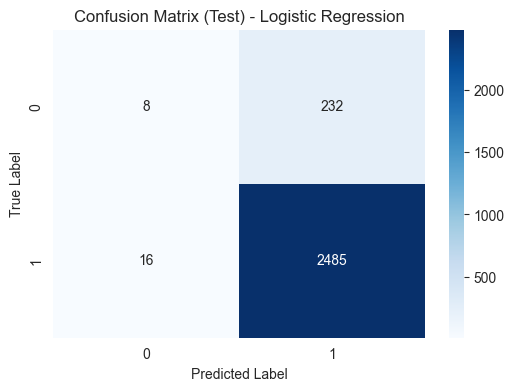

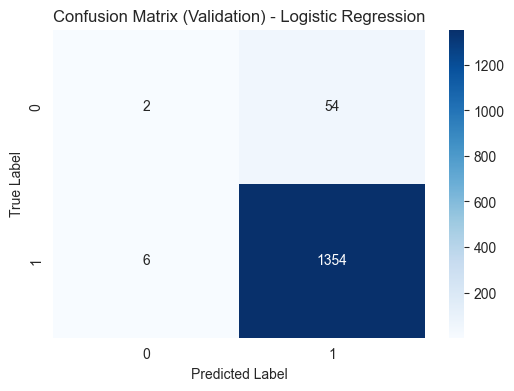


Training Random Forest...

=== Random Forest ===
Test Set Metrics:
Accuracy: 0.9066
Precision: 0.9131
Recall: 0.9920
F1-Score: 0.9509
ROC-AUC: 0.5917

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.17      0.02      0.03       240
           1       0.91      0.99      0.95      2501

    accuracy                           0.91      2741
   macro avg       0.54      0.50      0.49      2741
weighted avg       0.85      0.91      0.87      2741


Validation Set Metrics:
Accuracy: 0.9590
Precision: 0.9604
Recall: 0.9985
F1-Score: 0.9791
ROC-AUC: 0.6364

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.96      1.00      0.98      1360

    accuracy                           0.96      1416
   macro avg       0.48      0.50      0.49      1416
weighted avg       0.92      0.96      0.94      1416



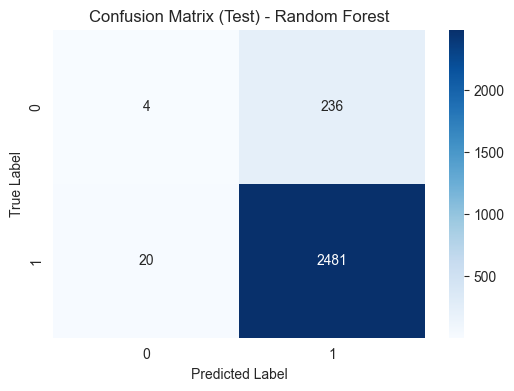

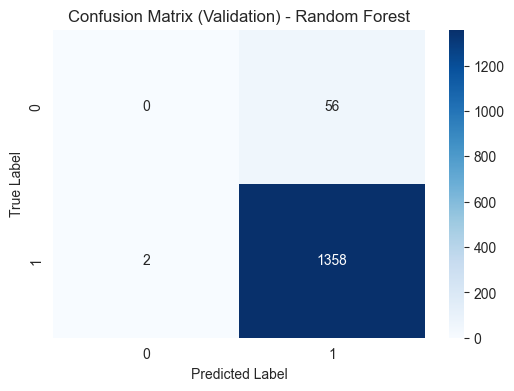


Training k-NN...

=== k-NN ===
Test Set Metrics:
Accuracy: 0.9124
Precision: 0.9124
Recall: 1.0000
F1-Score: 0.9542
ROC-AUC: 0.4977

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       240
           1       0.91      1.00      0.95      2501

    accuracy                           0.91      2741
   macro avg       0.46      0.50      0.48      2741
weighted avg       0.83      0.91      0.87      2741


Validation Set Metrics:
Accuracy: 0.9605
Precision: 0.9605
Recall: 1.0000
F1-Score: 0.9798
ROC-AUC: 0.5392

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.96      1.00      0.98      1360

    accuracy                           0.96      1416
   macro avg       0.48      0.50      0.49      1416
weighted avg       0.92      0.96      0.94      1416



C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1532: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1532: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1532: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

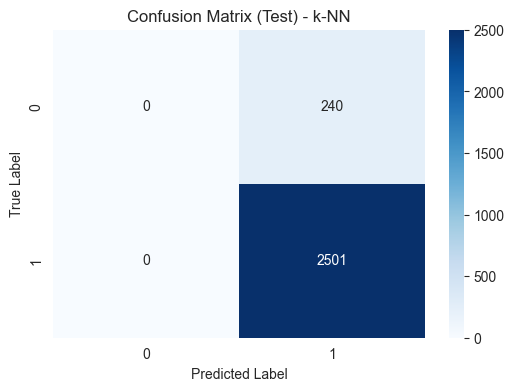

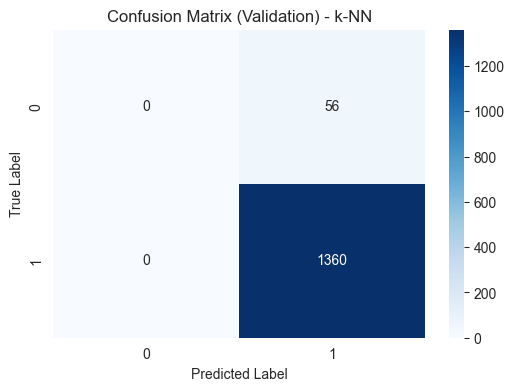


Training XGBoost...


C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Test Set Metrics:
Accuracy: 0.9117
Precision: 0.9127
Recall: 0.9988
F1-Score: 0.9538
ROC-AUC: 0.5740

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.25      0.00      0.01       240
           1       0.91      1.00      0.95      2501

    accuracy                           0.91      2741
   macro avg       0.58      0.50      0.48      2741
weighted avg       0.85      0.91      0.87      2741


Validation Set Metrics:
Accuracy: 0.9612
Precision: 0.9611
Recall: 1.0000
F1-Score: 0.9802
ROC-AUC: 0.6138

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        56
           1       0.96      1.00      0.98      1360

    accuracy                           0.96      1416
   macro avg       0.98      0.51      0.51      1416
weighted avg       0.96      0.96      0.94      1416



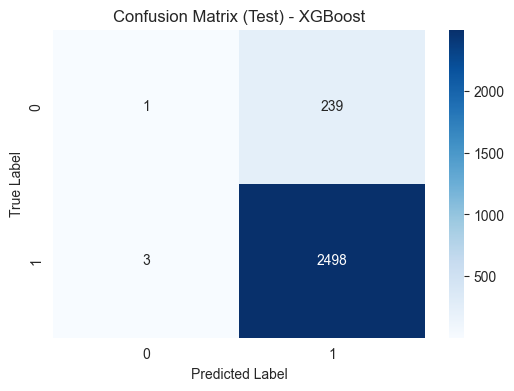

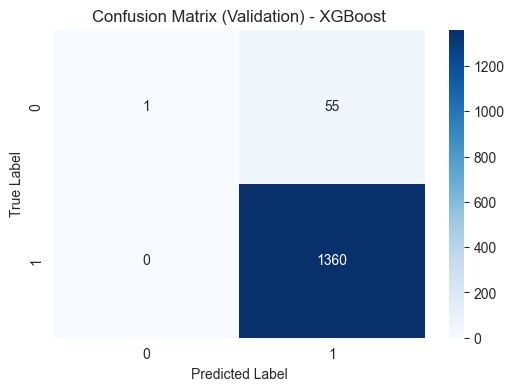


=== Model Comparison (Test Set) ===
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.909522   0.914612  0.993603  0.952472  0.581072
Random Forest        0.906603   0.913139  0.992003  0.950939  0.591717
k-NN                 0.912441   0.912441  1.000000  0.954216  0.497726
XGBoost              0.911711   0.912678  0.998800  0.953799  0.573953

=== Model Comparison (Validation Set) ===
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.957627   0.961648  0.995588  0.978324  0.616426
Random Forest        0.959040   0.960396  0.998529  0.979092  0.636377
k-NN                 0.960452   0.960452  1.000000  0.979827  0.539161
XGBoost              0.961158   0.961131  1.000000  0.980180  0.613839


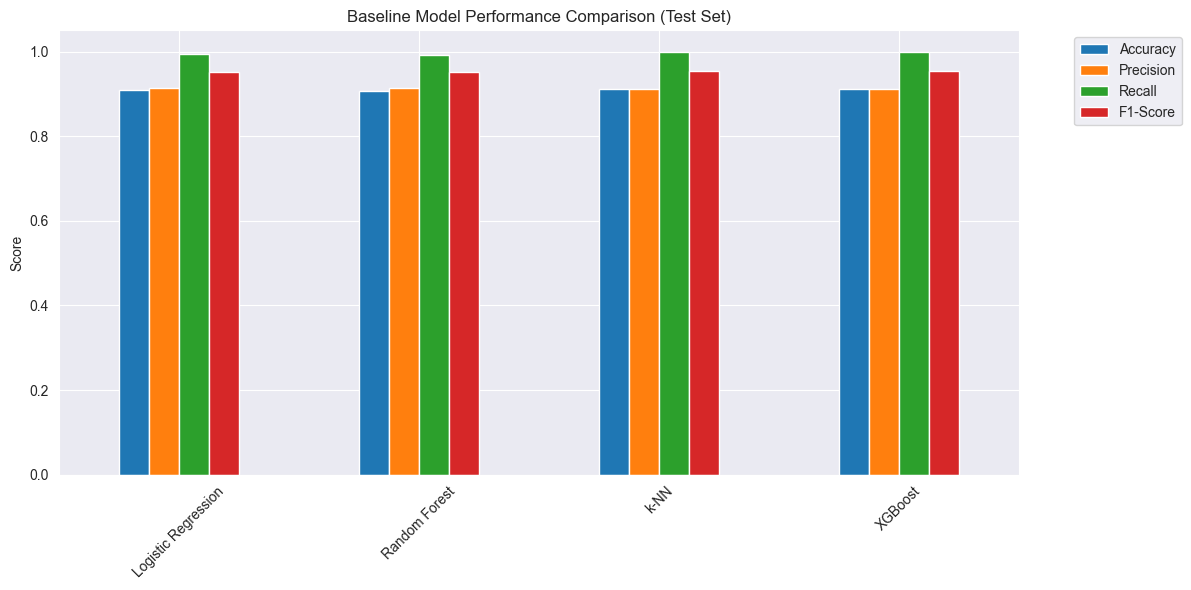

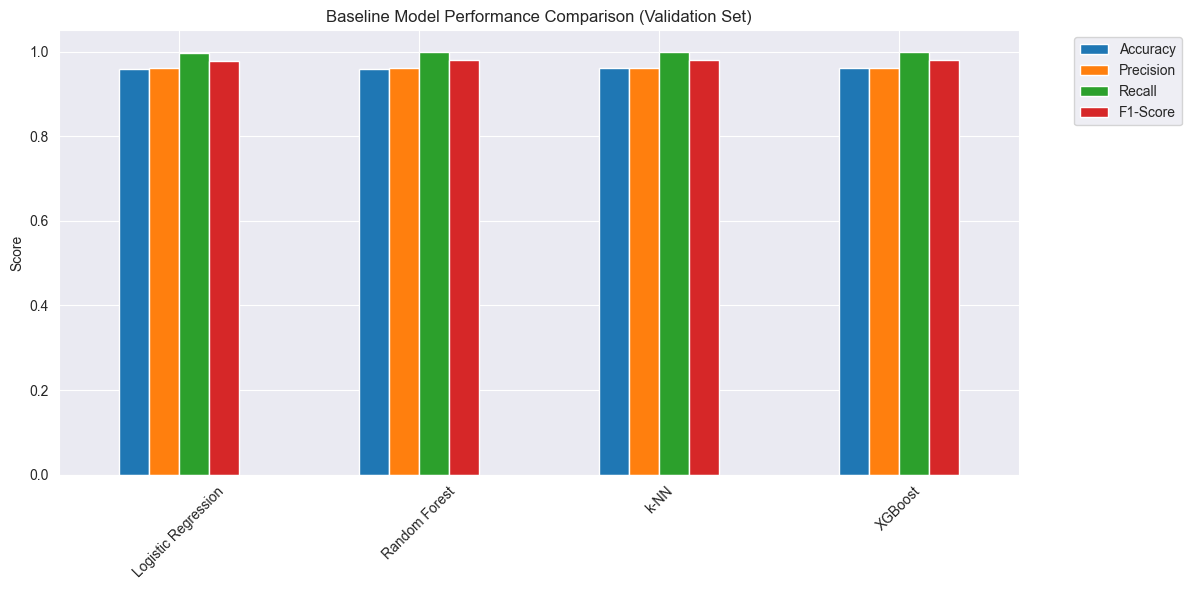

In [16]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, classification_report,
                            confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation + '’”'

# Cleaning function
def clean_message(message):
    """Clean the message by removing special characters and converting to lowercase."""
    message = (message.replace('\n', ' ')
                      .replace('-', ' ')
                      .replace('...', ' ')
                      .replace('???', '?'))
    message = re.sub(r'[^\w\s]', '', message)
    return message.lower().strip()

# Tokenization function
def tokenize_message(message):
    """Tokenize the message and remove stopwords and punctuation."""
    tokens = word_tokenize(message)
    tokens = [t for t in tokens if t not in stop_words and t not in punctuations]
    return tokens

# Preprocess datasets
# Assuming df_train, df_test, df_valid have 'message' and 'sender_label' columns
for df in [df_train, df_test, df_valid]:
    df['message'] = df['message'].apply(clean_message)
    df = df[df['message'] != ''].reset_index(drop=True)

# Vectorize messages using CountVectorizer
vectorizer = CountVectorizer(
    max_features=5000,  # Limit to top 5000 features for simplicity
    tokenizer=tokenize_message
)

# Fit vectorizer on training data only and transform all sets
X_train = vectorizer.fit_transform(df_train['message']).toarray()
y_train = df_train['sender_label'].astype(int)

X_test = vectorizer.transform(df_test['message']).toarray()
y_test = df_test['sender_label'].astype(int)

X_validate = vectorizer.transform(df_valid['message']).toarray()
y_validate = df_valid['sender_label'].astype(int)

# Define baseline models (removed SVM, added others)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'k-NN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, nthread=-1)
}

# Evaluation function
def evaluate_model(model, X_test, y_test, X_validate, y_validate, model_name):
    """Evaluate the model on test and validation sets with all classification metrics."""
    # Test set predictions
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Validation set predictions
    y_pred_validate = model.predict(X_validate)
    y_pred_proba_validate = model.predict_proba(X_validate)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics for test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test) if y_pred_proba_test is not None else "N/A"
    
    # Metrics for validation set
    accuracy_val = accuracy_score(y_validate, y_pred_validate)
    precision_val = precision_score(y_validate, y_pred_validate)
    recall_val = recall_score(y_validate, y_pred_validate)
    f1_val = f1_score(y_validate, y_pred_validate)
    roc_auc_val = roc_auc_score(y_validate, y_pred_proba_validate) if y_pred_proba_validate is not None else "N/A"
    
    # Print results
    print(f"\n=== {model_name} ===")
    print("Test Set Metrics:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    print(f"ROC-AUC: {roc_auc_test if isinstance(roc_auc_test, str) else roc_auc_test:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    
    print("\nValidation Set Metrics:")
    print(f"Accuracy: {accuracy_val:.4f}")
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall: {recall_val:.4f}")
    print(f"F1-Score: {f1_val:.4f}")
    print(f"ROC-AUC: {roc_auc_val if isinstance(roc_auc_val, str) else roc_auc_val:.4f}")
    print("\nClassification Report (Validation):")
    print(classification_report(y_validate, y_pred_validate))
    
    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Test) - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Confusion Matrix for Validation Set
    cm_val = confusion_matrix(y_validate, y_pred_validate)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Validation) - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train and evaluate each model
results_test = {}
results_validate = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test, X_validate, y_validate, name)
    
    # Store results for comparison
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    results_test[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1-Score': f1_score(y_test, y_pred_test),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba_test) if y_pred_proba_test is not None else "N/A"
    }
    
    y_pred_val = model.predict(X_validate)
    y_pred_proba_val = model.predict_proba(X_validate)[:, 1] if hasattr(model, "predict_proba") else None
    results_validate[name] = {
        'Accuracy': accuracy_score(y_validate, y_pred_val),
        'Precision': precision_score(y_validate, y_pred_val),
        'Recall': recall_score(y_validate, y_pred_val),
        'F1-Score': f1_score(y_validate, y_pred_val),
        'ROC-AUC': roc_auc_score(y_validate, y_pred_proba_val) if y_pred_proba_val is not None else "N/A"
    }

# Compare model performance
results_test_df = pd.DataFrame(results_test).T
results_validate_df = pd.DataFrame(results_validate).T

print("\n=== Model Comparison (Test Set) ===")
print(results_test_df)

print("\n=== Model Comparison (Validation Set) ===")
print(results_validate_df)

# Plot comparison for Test Set
results_test_df.drop('ROC-AUC', axis=1).plot(kind='bar', figsize=(12, 6))
plt.title('Baseline Model Performance Comparison (Test Set)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot comparison for Validation Set
results_validate_df.drop('ROC-AUC', axis=1).plot(kind='bar', figsize=(12, 6))
plt.title('Baseline Model Performance Comparison (Validation Set)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Satwik
[nltk_data]     Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Satwik
[nltk_data]     Garg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Training Logistic Regression...

=== Logistic Regression ===
Test Set Metrics:
Accuracy: 0.5918
Precision: 0.9041
Recall: 0.6182
F1-Score: 0.7343
ROC-AUC: 0.4713

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.07      0.32      0.12       240
           1       0.90      0.62      0.73      2501

    accuracy                           0.59      2741
   macro avg       0.49      0.47      0.43      2741
weighted avg       0.83      0.59      0.68      2741


Validation Set Metrics:
Accuracy: 0.6095
Precision: 0.9622
Recall: 0.6176
F1-Score: 0.7524
ROC-AUC: 0.4928

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.04      0.41      0.08        56
           1       0.96      0.62      0.75      1360

    accuracy                           0.61      1416
   macro avg       0.50      0.51      0.41      1416
weighted avg       0.93      0.61      0.73      1416



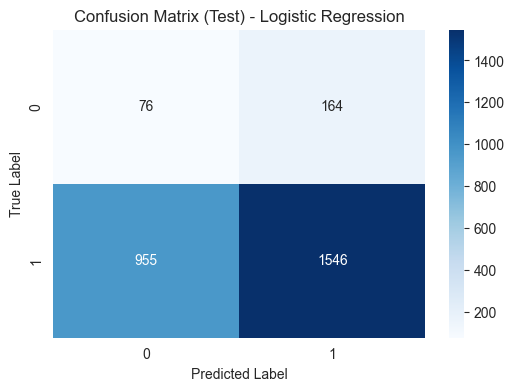

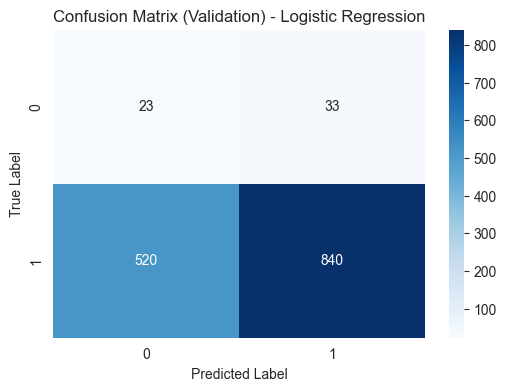


Training Random Forest...

=== Random Forest ===
Test Set Metrics:
Accuracy: 0.8935
Precision: 0.9126
Recall: 0.9768
F1-Score: 0.9436
ROC-AUC: 0.5867

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.09      0.03      0.04       240
           1       0.91      0.98      0.94      2501

    accuracy                           0.89      2741
   macro avg       0.50      0.50      0.49      2741
weighted avg       0.84      0.89      0.86      2741


Validation Set Metrics:
Accuracy: 0.9400
Precision: 0.9610
Recall: 0.9772
F1-Score: 0.9690
ROC-AUC: 0.5910

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.06      0.04      0.04        56
           1       0.96      0.98      0.97      1360

    accuracy                           0.94      1416
   macro avg       0.51      0.51      0.51      1416
weighted avg       0.93      0.94      0.93      1416



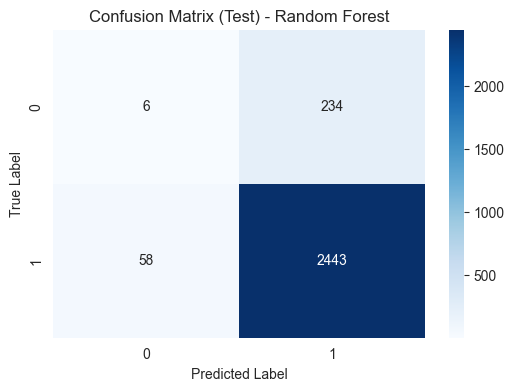

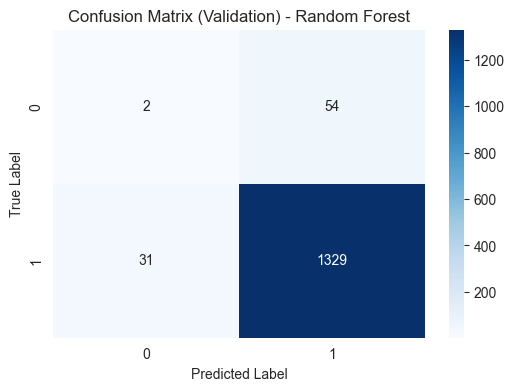


Training Decision Tree...

=== Decision Tree ===
Test Set Metrics:
Accuracy: 0.8490
Precision: 0.9226
Recall: 0.9108
F1-Score: 0.9167
ROC-AUC: 0.5352

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.18      0.20      0.19       240
           1       0.92      0.91      0.92      2501

    accuracy                           0.85      2741
   macro avg       0.55      0.56      0.55      2741
weighted avg       0.86      0.85      0.85      2741


Validation Set Metrics:
Accuracy: 0.8771
Precision: 0.9618
Recall: 0.9081
F1-Score: 0.9342
ROC-AUC: 0.5035

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.05      0.12      0.07        56
           1       0.96      0.91      0.93      1360

    accuracy                           0.88      1416
   macro avg       0.51      0.52      0.50      1416
weighted avg       0.93      0.88      0.90      1416



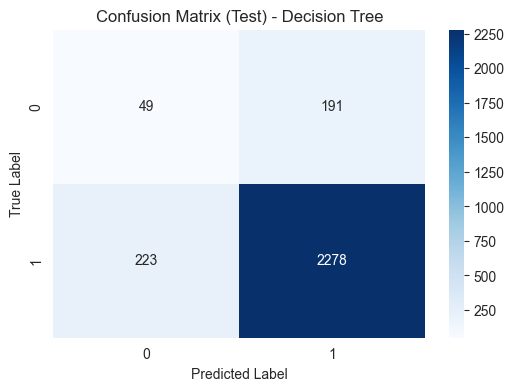

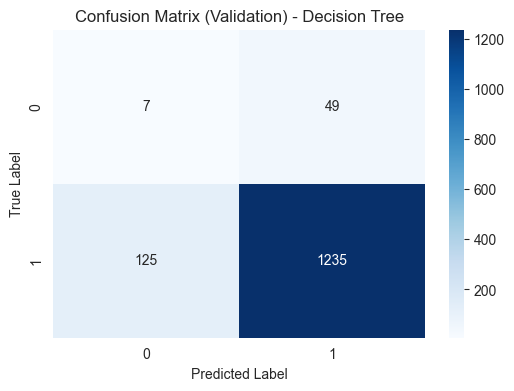


Training k-NN...

=== k-NN ===
Test Set Metrics:
Accuracy: 0.5578
Precision: 0.9387
Recall: 0.5514
F1-Score: 0.6947
ROC-AUC: 0.6150

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.12      0.62      0.20       240
           1       0.94      0.55      0.69      2501

    accuracy                           0.56      2741
   macro avg       0.53      0.59      0.45      2741
weighted avg       0.87      0.56      0.65      2741


Validation Set Metrics:
Accuracy: 0.5516
Precision: 0.9714
Recall: 0.5493
F1-Score: 0.7017
ROC-AUC: 0.5945

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.05      0.61      0.10        56
           1       0.97      0.55      0.70      1360

    accuracy                           0.55      1416
   macro avg       0.51      0.58      0.40      1416
weighted avg       0.94      0.55      0.68      1416



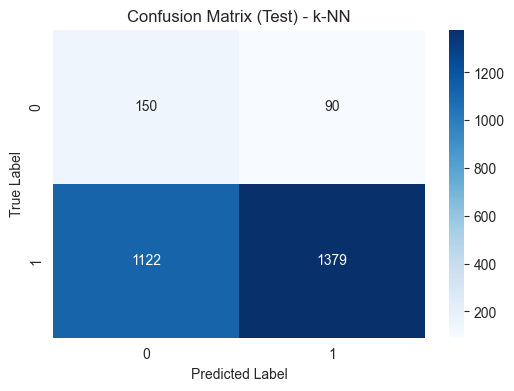

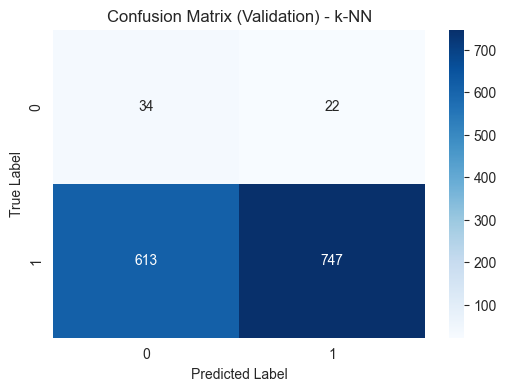


Training XGBoost...


C:\Users\Satwik  Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Test Set Metrics:
Accuracy: 0.7848
Precision: 0.9174
Recall: 0.8397
F1-Score: 0.8768
ROC-AUC: 0.5438

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.11      0.21      0.15       240
           1       0.92      0.84      0.88      2501

    accuracy                           0.78      2741
   macro avg       0.52      0.53      0.51      2741
weighted avg       0.85      0.78      0.81      2741


Validation Set Metrics:
Accuracy: 0.8369
Precision: 0.9631
Recall: 0.8632
F1-Score: 0.9104
ROC-AUC: 0.5600

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.06      0.20      0.09        56
           1       0.96      0.86      0.91      1360

    accuracy                           0.84      1416
   macro avg       0.51      0.53      0.50      1416
weighted avg       0.93      0.84      0.88      1416



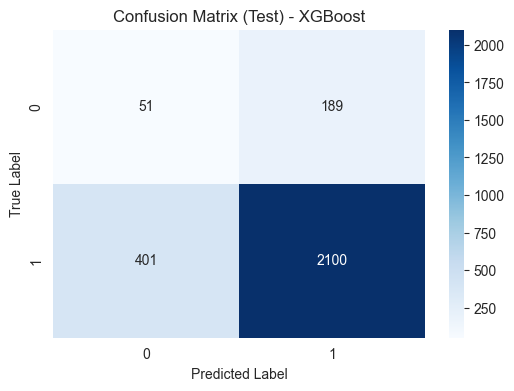

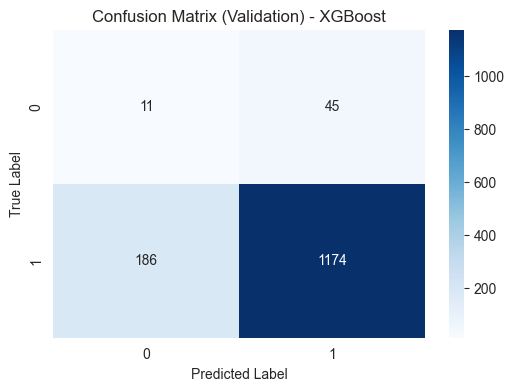


=== Model Comparison (Test Set) ===
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.591755   0.904094  0.618153  0.734267  0.471251
Random Forest        0.893470   0.912589  0.976809  0.943608  0.586736
Decision Tree        0.848960   0.922641  0.910836  0.916700  0.535245
k-NN                 0.557826   0.938734  0.551379  0.694710  0.615015
XGBoost              0.784750   0.917431  0.839664  0.876827  0.543848

=== Model Comparison (Validation Set) ===
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.609463   0.962199  0.617647  0.752351  0.492844
Random Forest        0.939972   0.960954  0.977206  0.969012  0.591039
Decision Tree        0.877119   0.961838  0.908088  0.934191  0.503512
k-NN                 0.551554   0.971391  0.549265  0.701738  0.594505
XGBoost              0.836864   0.963084  0.863235  0.910430  0.559953


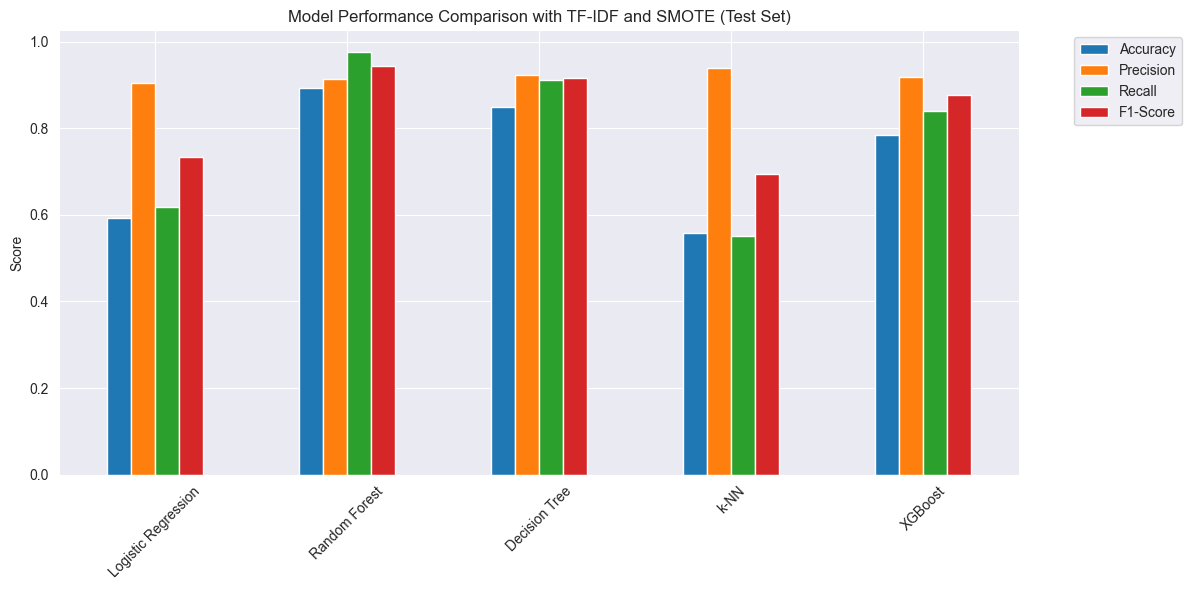

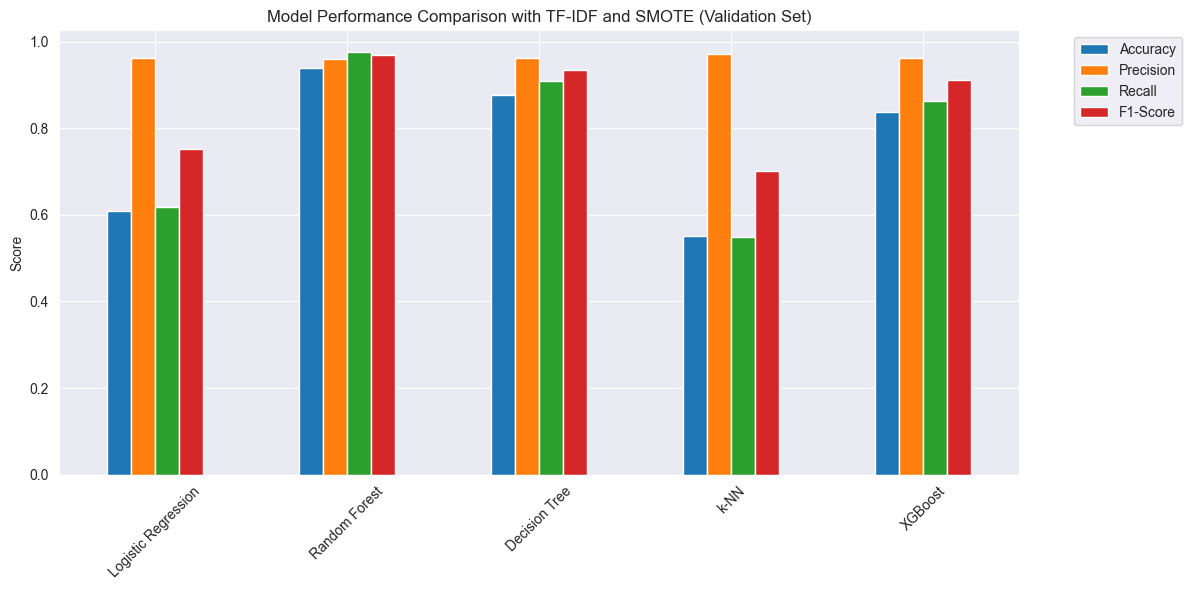

In [18]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, classification_report,
                            confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation + '’”'

# Cleaning function
def clean_message(message):
    """Clean the message by removing special characters and converting to lowercase."""
    message = (message.replace('\n', ' ')
                      .replace('-', ' ')
                      .replace('...', ' ')
                      .replace('???', '?'))
    message = re.sub(r'[^\w\s]', '', message)
    return message.lower().strip()

# Tokenization function
def tokenize_message(message):
    """Tokenize the message and remove stopwords and punctuation."""
    tokens = word_tokenize(message)
    tokens = [t for t in tokens if t not in stop_words and t not in punctuations]
    return tokens

# Preprocess datasets
# Assuming df_train, df_test, df_validate have 'message' and 'sender_label' columns
for df in [df_train, df_test, df_valid]:
    df['message'] = df['message'].apply(clean_message)
    df = df[df['message'] != ''].reset_index(drop=True)

# Vectorize messages using TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.90,           # Ignore terms in more than 90% of documents
    max_features=5000,     # Limit to top 5000 features
    min_df=0.01,          # Ignore terms in less than 1% of documents
    use_idf=True,         # Use inverse document frequency
    tokenizer=tokenize_message,
    ngram_range=(1, 2)    # Use unigrams and bigrams
)

# Fit vectorizer on training data only and transform all sets
X_train = vectorizer.fit_transform(df_train['message']).toarray()
y_train = df_train['sender_label'].astype(int)

X_test = vectorizer.transform(df_test['message']).toarray()
y_test = df_test['sender_label'].astype(int)

X_validate = vectorizer.transform(df_valid['message']).toarray()
y_validate = df_valid['sender_label'].astype(int)

# Apply SMOTE to training data only
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models with n_jobs=-1 where applicable
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000, 
        random_state=42, 
        solver='saga',  # 'saga' supports n_jobs for large datasets
        n_jobs=-1
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        n_jobs=-1  # Parallelize tree building
    ),
    'Decision Tree': DecisionTreeClassifier(
        random_state=42  # No n_jobs support
    ),
    'k-NN': KNeighborsClassifier(
        n_neighbors=5, 
        n_jobs=-1  # Parallelize distance computations
    ),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss', 
        random_state=42, 
        nthread=-1  # XGBoost's equivalent to n_jobs
    )
}

# Evaluation function
def evaluate_model(model, X_test, y_test, X_validate, y_validate, model_name):
    """Evaluate the model on test and validation sets with all classification metrics."""
    # Test set predictions
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Validation set predictions
    y_pred_validate = model.predict(X_validate)
    y_pred_proba_validate = model.predict_proba(X_validate)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics for test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test) if y_pred_proba_test is not None else "N/A"
    
    # Metrics for validation set
    accuracy_val = accuracy_score(y_validate, y_pred_validate)
    precision_val = precision_score(y_validate, y_pred_validate)
    recall_val = recall_score(y_validate, y_pred_validate)
    f1_val = f1_score(y_validate, y_pred_validate)
    roc_auc_val = roc_auc_score(y_validate, y_pred_proba_validate) if y_pred_proba_validate is not None else "N/A"
    
    # Print results
    print(f"\n=== {model_name} ===")
    print("Test Set Metrics:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    print(f"ROC-AUC: {roc_auc_test if isinstance(roc_auc_test, str) else roc_auc_test:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    
    print("\nValidation Set Metrics:")
    print(f"Accuracy: {accuracy_val:.4f}")
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall: {recall_val:.4f}")
    print(f"F1-Score: {f1_val:.4f}")
    print(f"ROC-AUC: {roc_auc_val if isinstance(roc_auc_val, str) else roc_auc_val:.4f}")
    print("\nClassification Report (Validation):")
    print(classification_report(y_validate, y_pred_validate))
    
    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Test) - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Confusion Matrix for Validation Set
    cm_val = confusion_matrix(y_validate, y_pred_validate)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Validation) - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train and evaluate each model
results_test = {}
results_validate = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    evaluate_model(model, X_test, y_test, X_validate, y_validate, name)
    
    # Store results for comparison
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    results_test[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1-Score': f1_score(y_test, y_pred_test),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba_test) if y_pred_proba_test is not None else "N/A"
    }
    
    y_pred_val = model.predict(X_validate)
    y_pred_proba_val = model.predict_proba(X_validate)[:, 1] if hasattr(model, "predict_proba") else None
    results_validate[name] = {
        'Accuracy': accuracy_score(y_validate, y_pred_val),
        'Precision': precision_score(y_validate, y_pred_val),
        'Recall': recall_score(y_validate, y_pred_val),
        'F1-Score': f1_score(y_validate, y_pred_val),
        'ROC-AUC': roc_auc_score(y_validate, y_pred_proba_val) if y_pred_proba_val is not None else "N/A"
    }

# Compare model performance
results_test_df = pd.DataFrame(results_test).T
results_validate_df = pd.DataFrame(results_validate).T

print("\n=== Model Comparison (Test Set) ===")
print(results_test_df)

print("\n=== Model Comparison (Validation Set) ===")
print(results_validate_df)

# Plot comparison for Test Set
results_test_df.drop('ROC-AUC', axis=1).plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison with TF-IDF and SMOTE (Test Set)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot comparison for Validation Set
results_validate_df.drop('ROC-AUC', axis=1).plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison with TF-IDF and SMOTE (Validation Set)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()